# 1. Installing Dependencies

In [305]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

/bin/bash: /home/shahgnp/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [306]:
!pip list 

/bin/bash: /home/shahgnp/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Package                      Version
---------------------------- -----------
absl-py                      1.4.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        22.2.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
cachetools                   5.2.1
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           3.0.1
comm                         0.1.2
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.5
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
executing                    1.2.

In [307]:
import tensorflow as tf
import os

In [308]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [309]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Removing images with unacceptable extensions

In [310]:
import cv2
import imghdr

In [311]:
data_dir='dataset'

In [312]:
img_exts=['jpeg','jpg','bmp','png']

In [313]:
img_exts

['jpeg', 'jpg', 'bmp', 'png']

In [314]:
os.listdir(os.path.join(data_dir,os.listdir(data_dir)[1]))

['person418.jpg',
 'person781.jpg',
 'person182.jpg',
 'person980.jpg',
 'person901.jpg',
 'person912.jpg',
 'person902.jpg',
 'person92.jpg',
 'person163.jpg',
 'person837.jpg',
 'person32.jpg',
 'person297.jpg',
 'person156.jpg',
 'person916.jpg',
 'person18.jpg',
 'person945.jpg',
 'person677.jpg',
 'person704.jpg',
 'person84.jpg',
 'person431.jpg',
 'person768.jpg',
 'person302.jpg',
 'person852.jpg',
 'person209.jpg',
 'person929.jpg',
 'person924.jpg',
 'person867.jpg',
 'person250.jpg',
 'person169.jpg',
 'person838.jpg',
 'person62.jpg',
 'person107.jpg',
 'person28.jpg',
 'person604.jpg',
 'person611.jpg',
 'person104.jpg',
 'person96.jpg',
 'person213.jpg',
 'person560.jpg',
 'person784.jpg',
 'person885.jpg',
 'person465.jpg',
 'person943.jpg',
 'person357.jpg',
 'person869.jpg',
 'person397.jpg',
 'person167.jpg',
 'person887.jpg',
 'person748.jpg',
 'person854.jpg',
 'person463.jpg',
 'person7.jpg',
 'person771.jpg',
 'person139.jpg',
 'person767.jpg',
 'person453.jpg',
 

In [315]:
for img_class in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir,img_class)):
        img_path=os.path.join(data_dir,img_class,img)
        try:
            img=cv2.imread(img_path)
            tip=imghdr.what(img_path)
            if tip not in img_exts:
                print('This image does not have correct extension: ',img_path)
                os.remove(img_path)
        except Excpetion as e:
            print('Issue with the image: ',img_path)

# 3. Load Data

In [316]:
import numpy as np

In [317]:
from matplotlib import pyplot as plt

In [318]:
data=tf.keras.utils.image_dataset_from_directory('dataset',image_size=(32,32))

Found 8779 files belonging to 10 classes.


In [319]:
data_iterator = data.as_numpy_iterator()

In [320]:
batch = data_iterator.next()

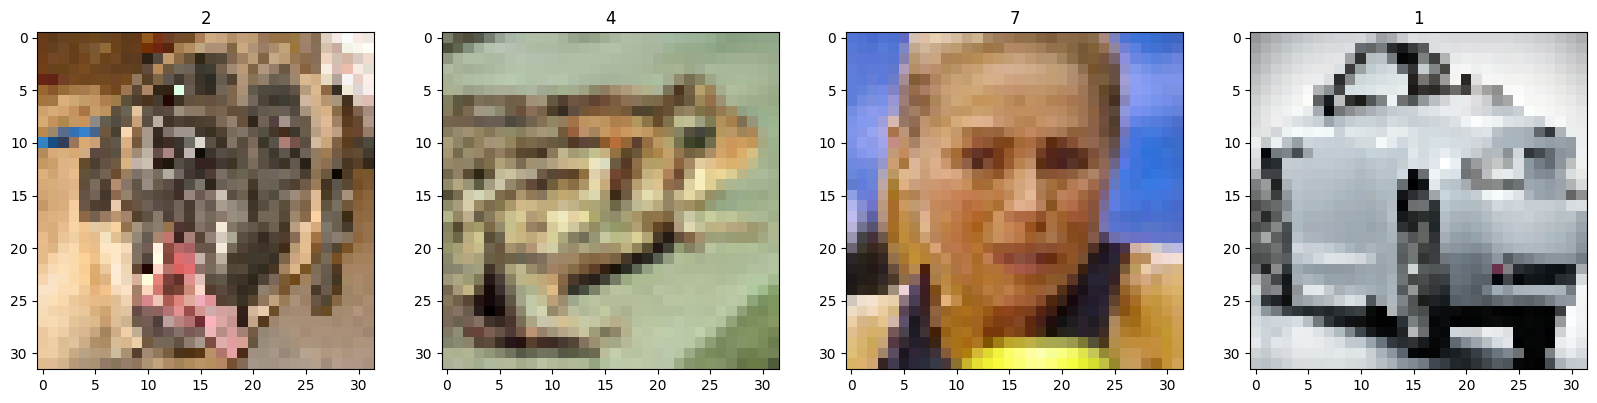

In [321]:


fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])



In [322]:
batch[0].shape

(32, 32, 32, 3)

0. Aeroplane
1. Automobile
2. Dog
3. Flower
4. Frog
5. Fruit
6. Motorcycle
7. Person
8. Rocket
9. Ship

# 4. Scale Data

In [323]:
data=data.map(lambda x,y:(x/32,y))

In [326]:
batch = data.as_numpy_iterator().next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

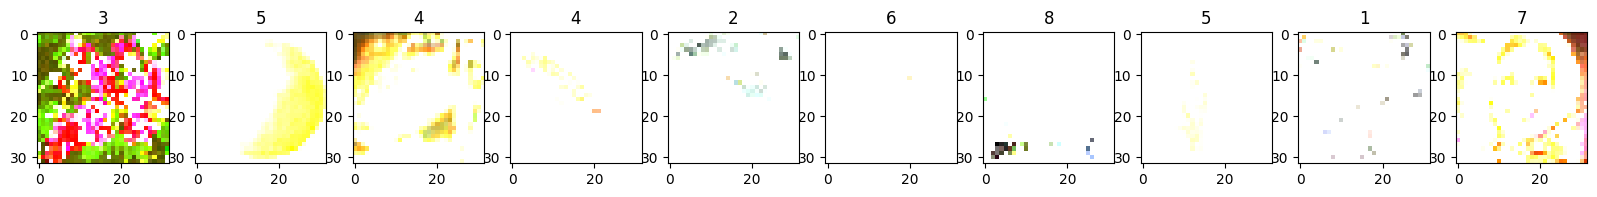

In [327]:


fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [328]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


In [329]:
train_size

192

In [330]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [331]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [332]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [333]:
model = Sequential()

In [347]:
model=tf.keras.models.Sequential() #if imported from tensorflow.keras import models we would write models.Sequential
    
model.add(tf.keras.layers.Conv2D(32,(3,3),1,activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),1,activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),1,activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [348]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [349]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_12 (Flatten)        (None, 1024)            

# 7. Train

In [343]:
logdir='logs'

In [344]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [345]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


ValueError: in user code:

    File "/home/shahgnp/anaconda3/envs/CNN/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/shahgnp/anaconda3/envs/CNN/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/shahgnp/anaconda3/envs/CNN/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/shahgnp/anaconda3/envs/CNN/lib/python3.10/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/shahgnp/anaconda3/envs/CNN/lib/python3.10/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/home/shahgnp/anaconda3/envs/CNN/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/shahgnp/anaconda3/envs/CNN/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/shahgnp/anaconda3/envs/CNN/lib/python3.10/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/shahgnp/anaconda3/envs/CNN/lib/python3.10/site-packages/keras/losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/shahgnp/anaconda3/envs/CNN/lib/python3.10/site-packages/keras/backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


# 8. Plot Performance

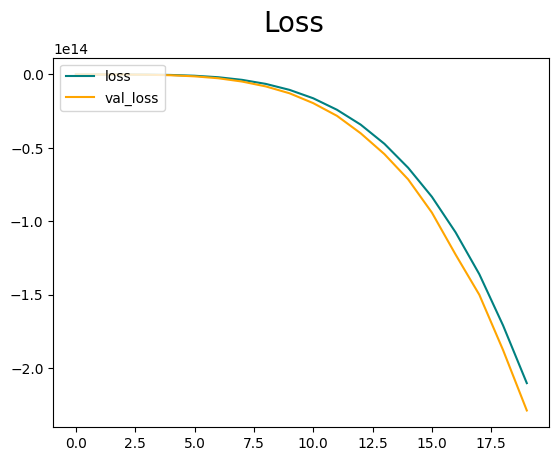

In [246]:


fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()



# 9. Evaluate

In [247]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [248]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [249]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 22ms/step


In [251]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8819444, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.11921296, shape=(), dtype=float32)


# 10. Test

In [252]:
import cv2

In [253]:
def predictionFunc(imgPath):
    
    pass

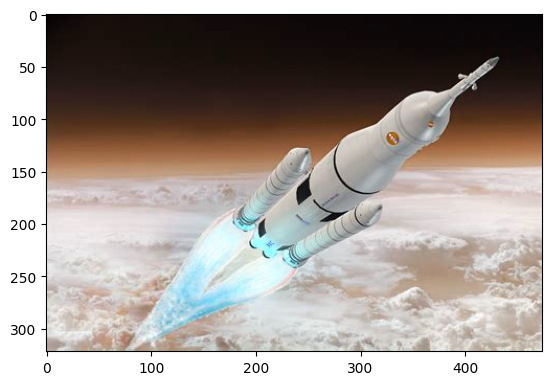

In [254]:
img = cv2.imread('./rockettest.jpeg')
plt.imshow(img)
plt.show()

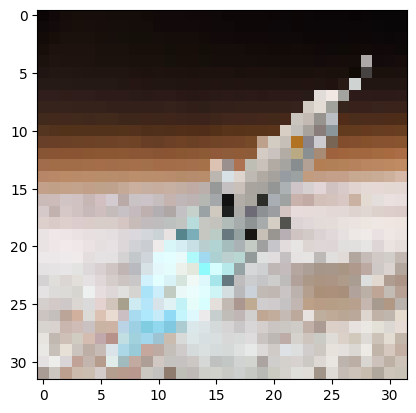

In [255]:
resize = tf.image.resize(img, (32,32))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [256]:
yhat = model.predict(np.expand_dims(resize/32, 0))

1/1 [==============================] - 0s 63ms/step


In [257]:
yhat


array([[1.]], dtype=float32)

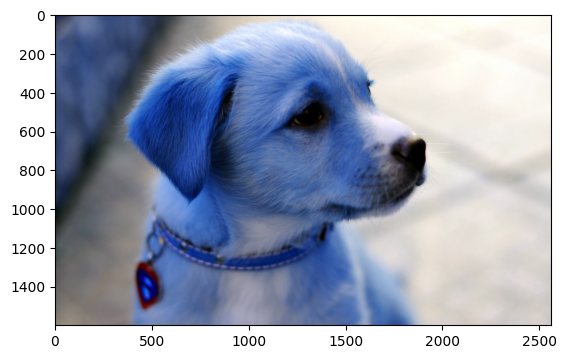

In [258]:
img = cv2.imread('./dogtest.jpeg')
plt.imshow(img)
plt.show()

(32, 32, 3)


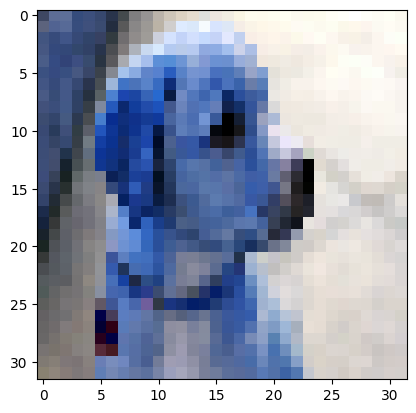

In [259]:
resize = tf.image.resize(img, (32,32))
print(resize.shape)
plt.imshow(resize.numpy().astype(int))
plt.show()

In [260]:
yhat = model.predict(np.expand_dims(resize/32, 0))

1/1 [==============================] - 0s 24ms/step


In [261]:
yhat

array([[1.]], dtype=float32)